In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm, linear_model, tree

# Reading the dataset
data = pd.read_csv("emotions.csv")

# Separating Positive, Negative, and Neutral dataframes for plotting
pos = data.loc[data["label"] == "POSITIVE"]
sample_pos = pos.loc[2, 'fft_0_b':'fft_749_b']
neg = data.loc[data["label"] == "NEGATIVE"] 
sample_neg = neg.loc[0, 'fft_0_b':'fft_749_b']
neu = data.loc[data["label"] == "NEUTRAL"]
sample_neu = neu.loc[1, 'fft_0_b':'fft_749_b']

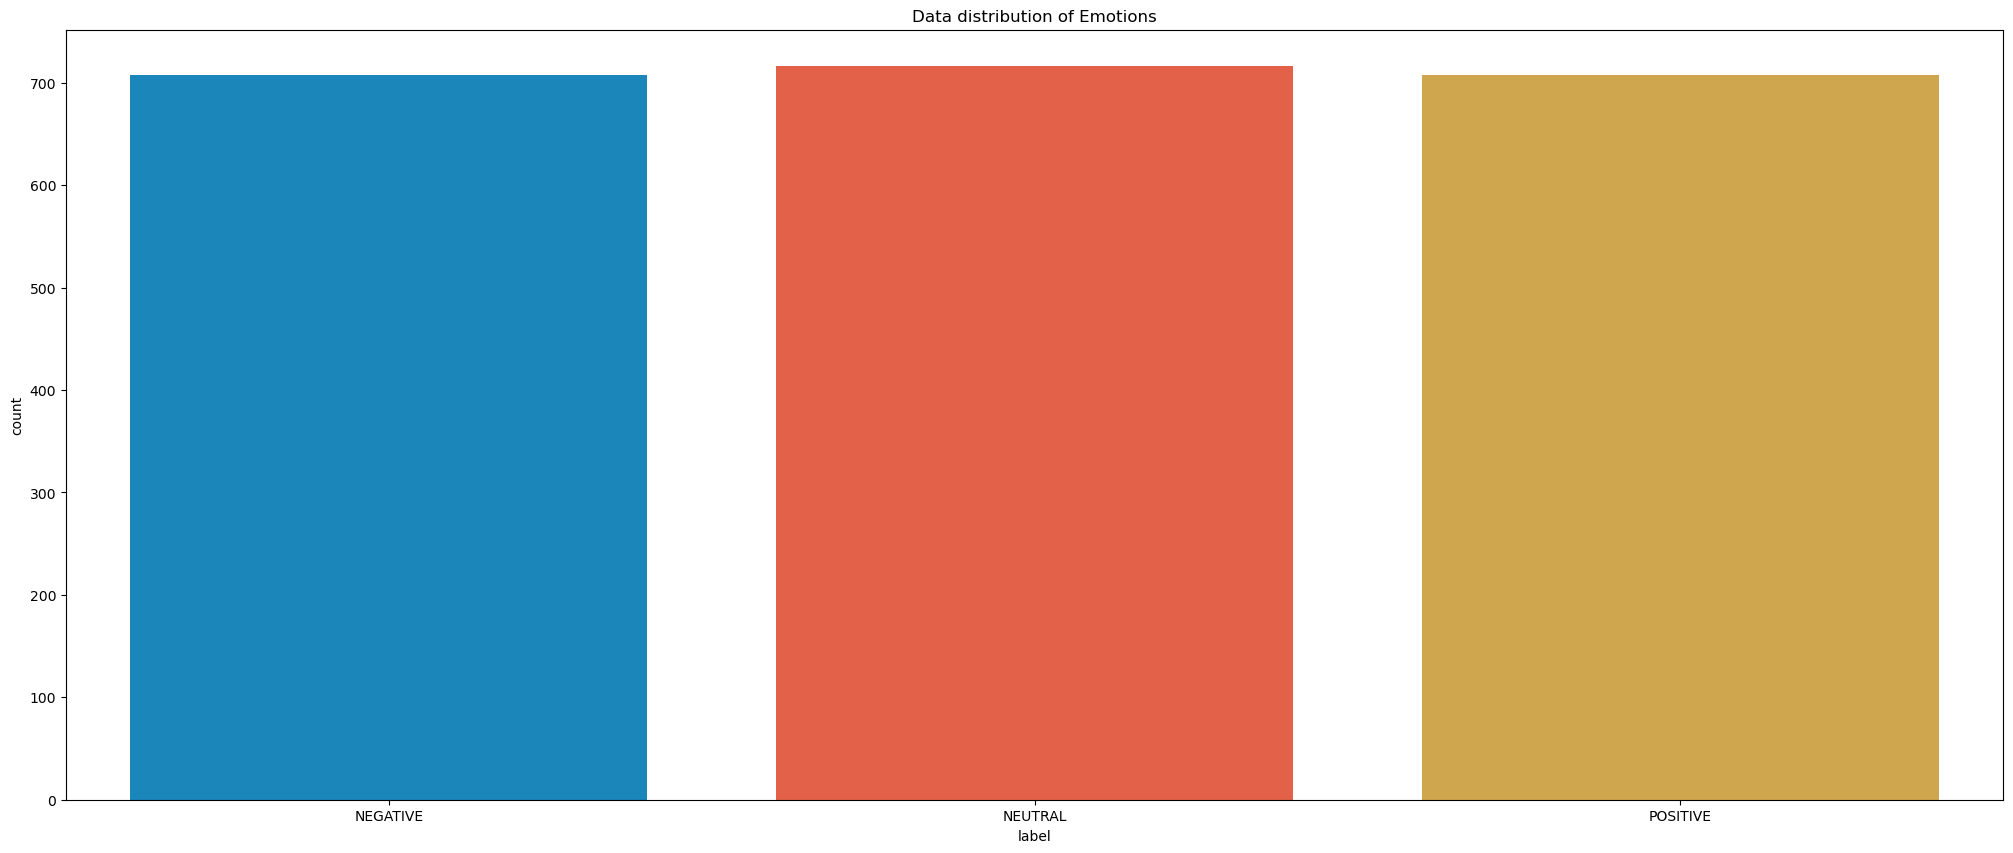

In [2]:
# Plotting Dataframe distribution
plt.figure(figsize=(25, 10))
plt.title("Data distribution of Emotions")
plt.style.use('fivethirtyeight')
sns.countplot(x='label', data=data)
plt.show()

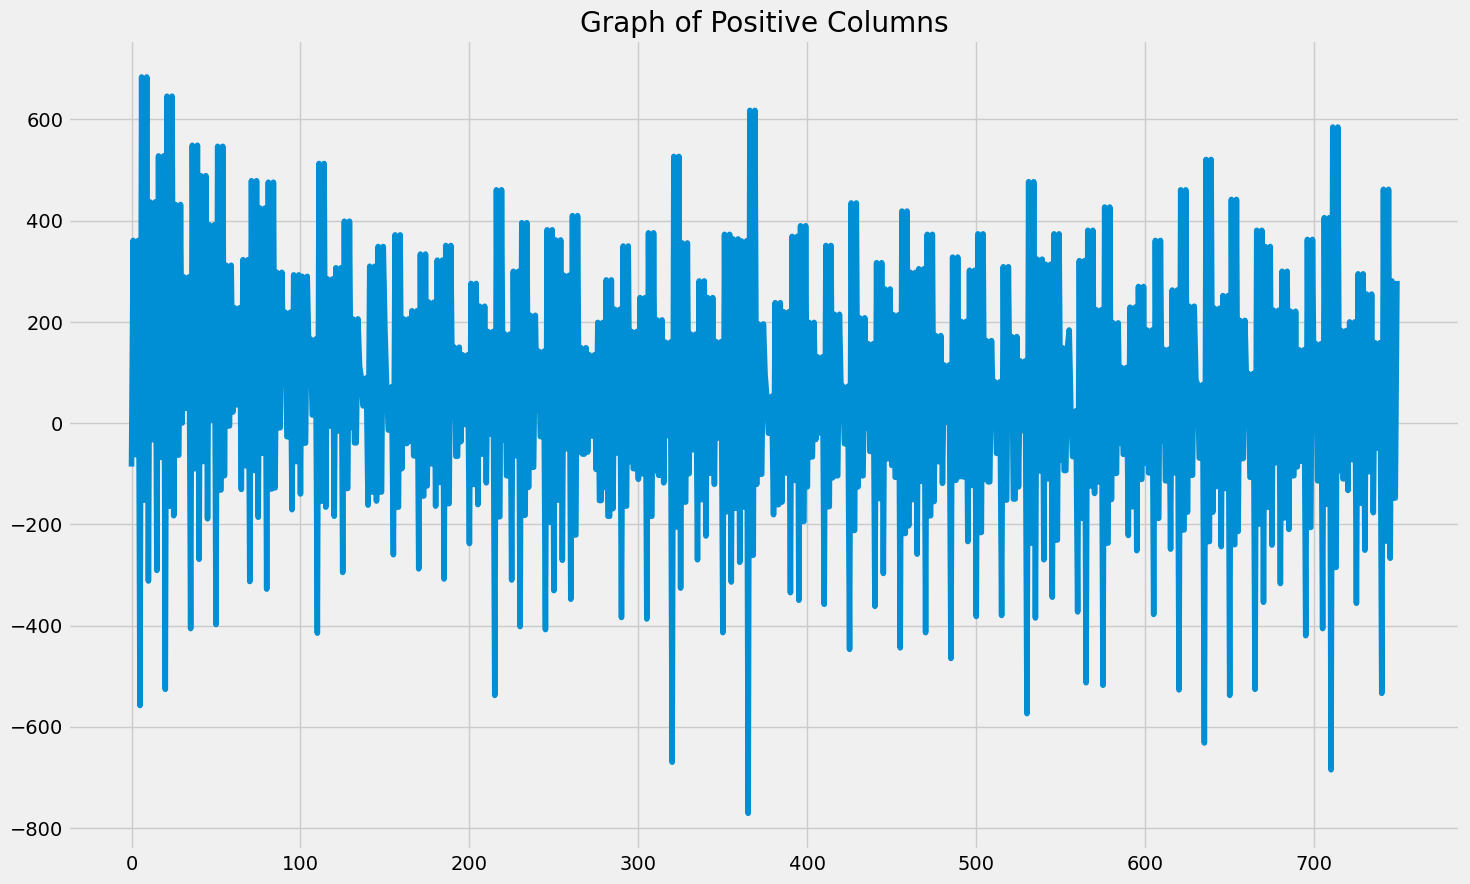

In [3]:
# Plotting Positive DataFrame
plt.figure(figsize=(16, 10))
plt.plot(range(len(sample_pos)), sample_pos)
plt.title("Graph of Positive Columns")
plt.show()

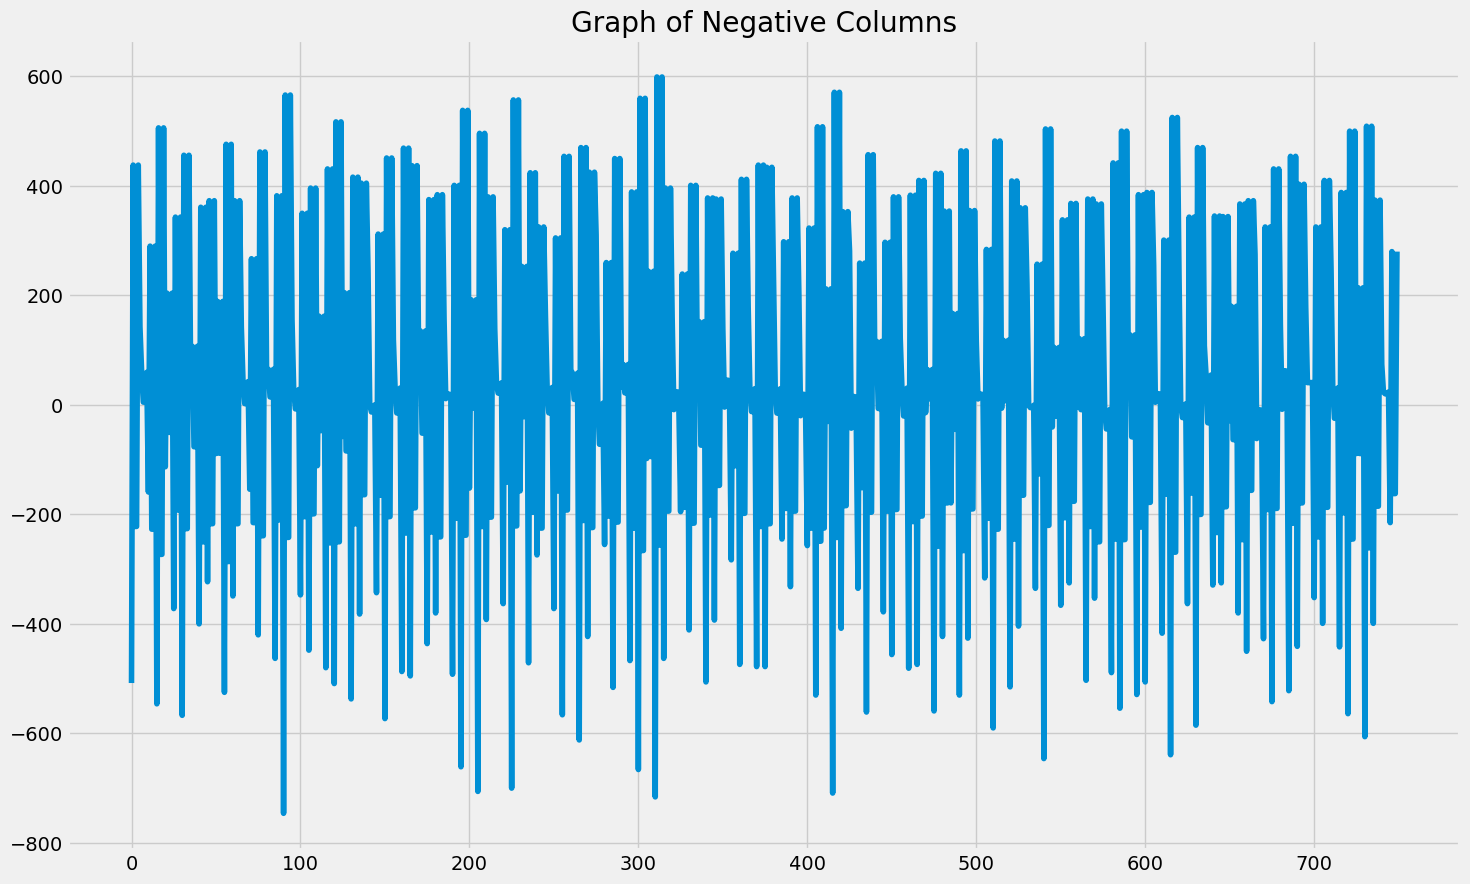

In [4]:
# Plotting Negative DataFrame
plt.figure(figsize=(16, 10))
plt.plot(range(len(sample_neg)), sample_neg)
plt.title("Graph of Negative Columns")
plt.show()

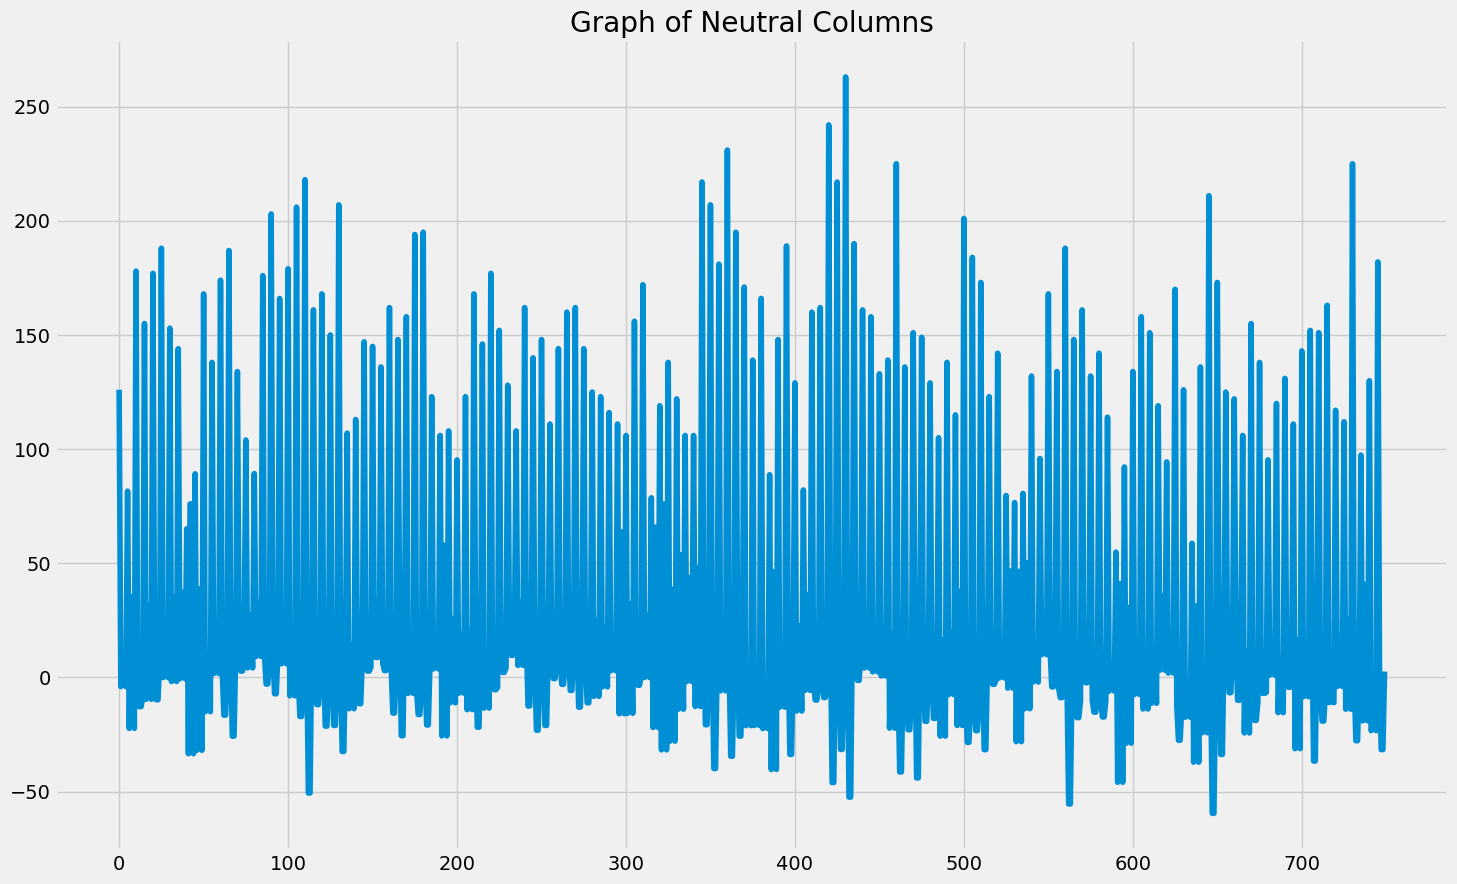

In [5]:
# Plotting Neutral DataFrame
plt.figure(figsize=(16, 10))
plt.plot(range(len(sample_neu)), sample_neu)
plt.title("Graph of Neutral Columns")
plt.show()

In [ ]:
# Transforming the data
def Transform_data(data):
    encoding_data = {'NEUTRAL': 0, 'POSITIVE': 1, 'NEGATIVE': 2}
    data_encoded = data.replace(encoding_data)
    x = data_encoded.drop(["label"], axis=1)
    y = data_encoded['label'].values
    scaler = StandardScaler()
    X = scaler.fit_transform(x)
    Y = to_categorical(y)
    return X, Y

# Splitting dataset into train and test
X, Y = Transform_data(data)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=5)

# Reshaping data for CNN
X_cnn = X.reshape((X.shape[0], X.shape[1], 1))
x_train_cnn, x_test_cnn, y_train_cnn, y_test_cnn = train_test_split(X_cnn, Y, test_size=0.2, random_state=4)

def create_cnn_model():
    model = Sequential()
    model.add(tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(x_train.shape[1], 1)))
    model.add(tf.keras.layers.MaxPooling1D(pool_size=2))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(100, activation='relu'))
    model.add(tf.keras.layers.Dense(3, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create and compile the model
cnn_model = create_cnn_model()

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = cnn_model.fit(x_train_cnn, y_train_cnn, epochs=10, validation_split=0.1)

# Evaluate the model
loss, acc = cnn_model.evaluate(x_test_cnn, y_test_cnn)
print(f"Loss on testing: {loss * 100:.2f}%")
print(f"Accuracy on Testing: {acc * 100:.2f}%")

C:\Users\knash\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.6791 - loss: 2.1628 - val_accuracy: 0.8772 - val_loss: 1.0728
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.9223 - loss: 0.4153 - val_accuracy: 0.9357 - val_loss: 0.2263
Epoch 3/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.9778 - loss: 0.0824 - val_accuracy: 0.9415 - val_loss: 0.1282
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.9801 - loss: 0.0495 - val_accuracy: 0.9708 - val_loss: 0.0696
Epoch 5/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.9902 - loss: 0.0384 - val_accuracy: 0.9708 - val_loss: 0.0995
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.9986 - loss: 0.0116 - val_accuracy: 0.9649 - val_loss: 0.1017
Epoch 7/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 1.0000 - loss: 0.0051 - val_accuracy: 0.9591 - val_loss: 0.1124
Epoch 8/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 1.0000 - loss: 0.0050 - val_accuracy: 0.9708 - v

In [7]:
# Make predictions
pred = cnn_model.predict(x_test_cnn)
pred_labels = np.argmax(pred, axis=1)
true_labels = np.argmax(y_test_cnn, axis=1)

# Print the first 10 predicted and actual labels
print("Predicted: ", pred_labels[:10])
print("Actual: ", true_labels[:10])

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted:  [1 1 1 2 1 1 2 1 2 1]
Actual:  [1 1 1 2 1 1 2 1 2 1]


<Figure size 2000x500 with 0 Axes>

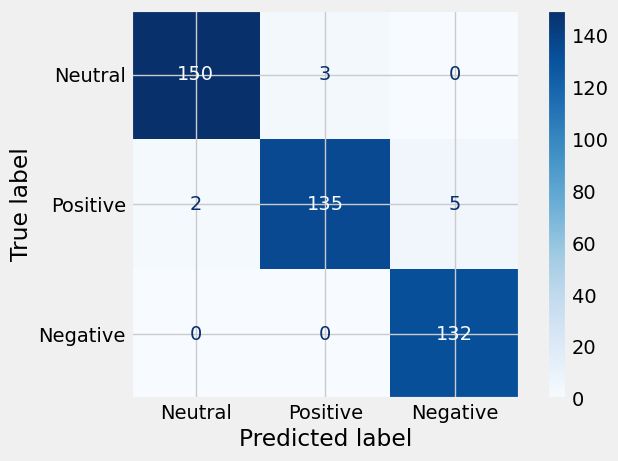

In [8]:
# Plot the confusion matrix
cm = confusion_matrix(true_labels, pred_labels)
plt.figure(figsize=(20, 5))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Neutral", "Positive", "Negative"]).plot(cmap=plt.cm.Blues)
plt.show()

In [9]:
# Classification Report of CNN model
print('\n*\t\tClassification Report OF Brain Waves CNN:\n', classification_report(np.argmax(y_test_cnn, axis=1), np.argmax(cnn_model.predict(x_test_cnn), axis=1)))

# Naive Bayes Classifier
Classifier_gnb = GaussianNB().fit(x_train, np.argmax(y_train, axis=1))
pred_gnb = Classifier_gnb.predict(x_test)
acc_gnb = np.mean(pred_gnb == np.argmax(y_test, axis=1))
print('Classification Report GNB: \n', classification_report(np.argmax(y_test, axis=1), pred_gnb))

# Support Vector Machine (SVM)
Classifier_svm = svm.SVC(kernel='linear').fit(x_train, np.argmax(y_train, axis=1))
pred_svm = Classifier_svm.predict(x_test)
acc_svm = np.mean(pred_svm == np.argmax(y_test, axis=1))
print('Classification Report SVM:\n', classification_report(np.argmax(y_test, axis=1), pred_svm))

# Logistic Regression
Classifier_LR = linear_model.LogisticRegression(solver='liblinear', C=75).fit(x_train, np.argmax(y_train, axis=1))
pred_LR = Classifier_LR.predict(x_test)
acc_LR = np.mean(pred_LR == np.argmax(y_test, axis=1))
print('Classification Report LR:\n', classification_report(np.argmax(y_test, axis=1), pred_LR))

# Decision Tree Classifier
Classifier_dt = tree.DecisionTreeClassifier().fit(x_train, np.argmax(y_train, axis=1))
pred_dt = Classifier_dt.predict(x_test)
acc_dt = np.mean(pred_dt == np.argmax(y_test, axis=1))
print('Classification Report Decision Tree:\n', classification_report(np.argmax(y_test, axis=1), pred_dt))

# Random Forest Classifier
Classifier_forest = RandomForestClassifier(n_estimators=50, random_state=0).fit(x_train, np.argmax(y_train, axis=1))
pred_fr = Classifier_forest.predict(x_test)
acc_fr = np.mean(pred_fr == np.argmax(y_test, axis=1))
print('Classification Report Random Forest:\n', classification_report(np.argmax(y_test, axis=1), pred_fr))

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

*		Classification Report OF Brain Waves CNN:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       153
           1       0.98      0.95      0.96       142
           2       0.96      1.00      0.98       132

    accuracy                           0.98       427
   macro avg       0.98      0.98      0.98       427
weighted avg       0.98      0.98      0.98       427

Classification Report GNB: 
               precision    recall  f1-score   support

           0       0.62      0.95      0.76       199
           1       0.46      0.35      0.39       208
           2       0.88      0.67      0.76       233

    accuracy                           0.65       640
   macro avg       0.65      0.66      0.64       640
weighted avg       0.66      0.65      0.64       640

Classification Report SVM:
               precision    recall  f1-score   support

           0       0.98      0.98      

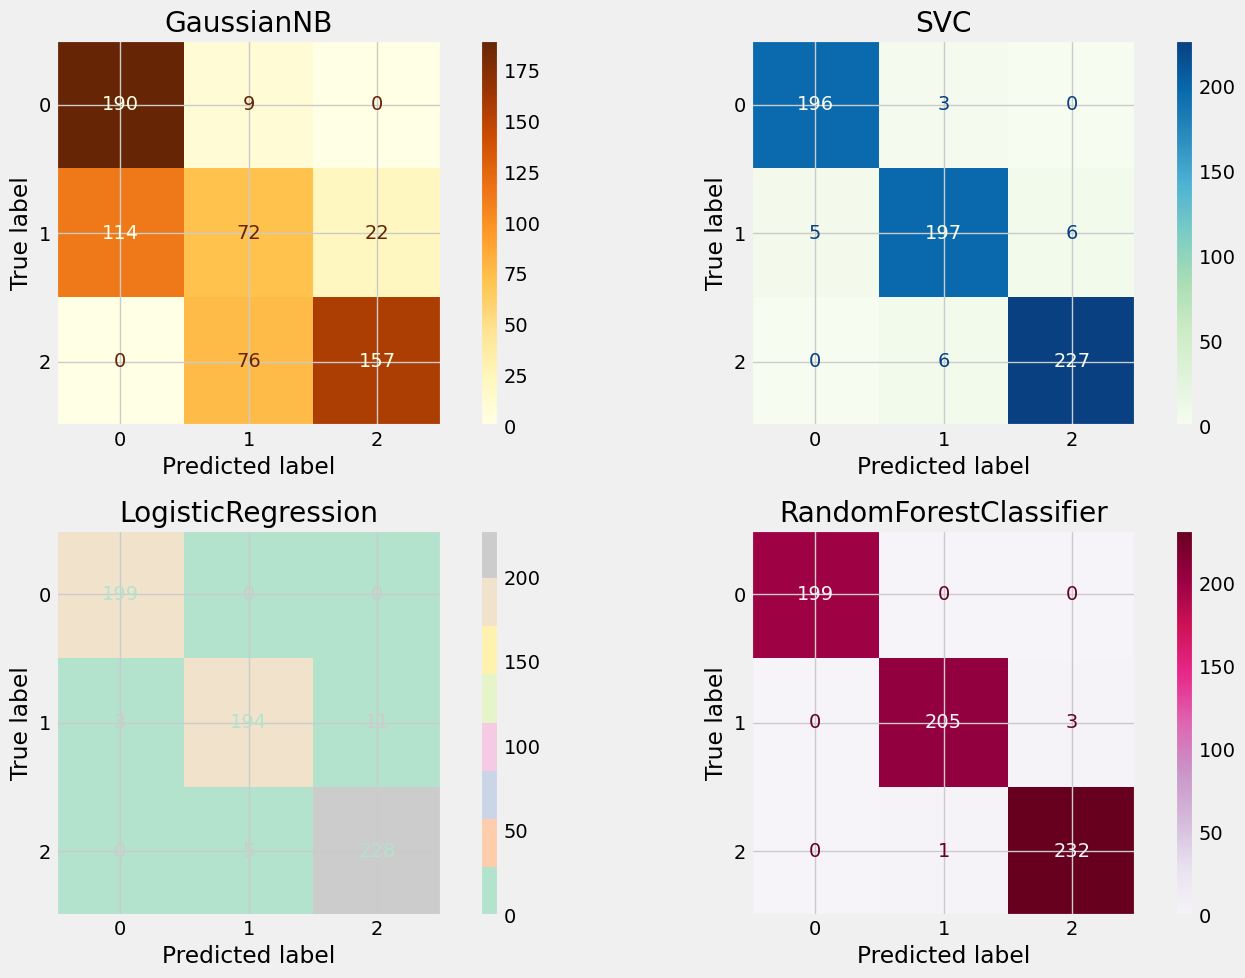

In [10]:
# Plotting confusion matrices for different classifiers
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
classifiers = [GaussianNB(), svm.SVC(kernel='linear'), linear_model.LogisticRegression(solver='liblinear', C=75),
               RandomForestClassifier(n_estimators=50, random_state=0)]
colors = ['YlOrBr', 'GnBu', 'Pastel2', 'PuRd']

for cls, ax, c in zip(classifiers, axes.flatten(), colors):
    cls.fit(x_train, np.argmax(y_train, axis=1))
    ConfusionMatrixDisplay.from_estimator(cls, x_test, np.argmax(y_test, axis=1), ax=ax, cmap=c)
    ax.title.set_text(cls.__class__.__name__)
plt.tight_layout()
plt.show()

In [11]:
# Collecting all accuracies
accuracies = {
    'CNN': acc,
    'Naive Bayes': acc_gnb,
    'SVM': acc_svm,
    'Logistic Regression': acc_LR,
    'Decision Tree': acc_dt,
    'Random Forest': acc_fr
}

# Display all accuracy scores
for model, accuracy in accuracies.items():
    print(f"Accuracy of {model}: {accuracy * 100:.2f}%")

# Determine the best model
best_model = max(accuracies, key=accuracies.get)
best_accuracy = accuracies[best_model]
print(f"\nThe best model is {best_model} with an accuracy of {best_accuracy * 100:.2f}%")

Accuracy of CNN: 97.66%
Accuracy of Naive Bayes: 65.47%
Accuracy of SVM: 96.88%
Accuracy of Logistic Regression: 97.03%
Accuracy of Decision Tree: 96.56%
Accuracy of Random Forest: 99.38%

The best model is Random Forest with an accuracy of 99.38%


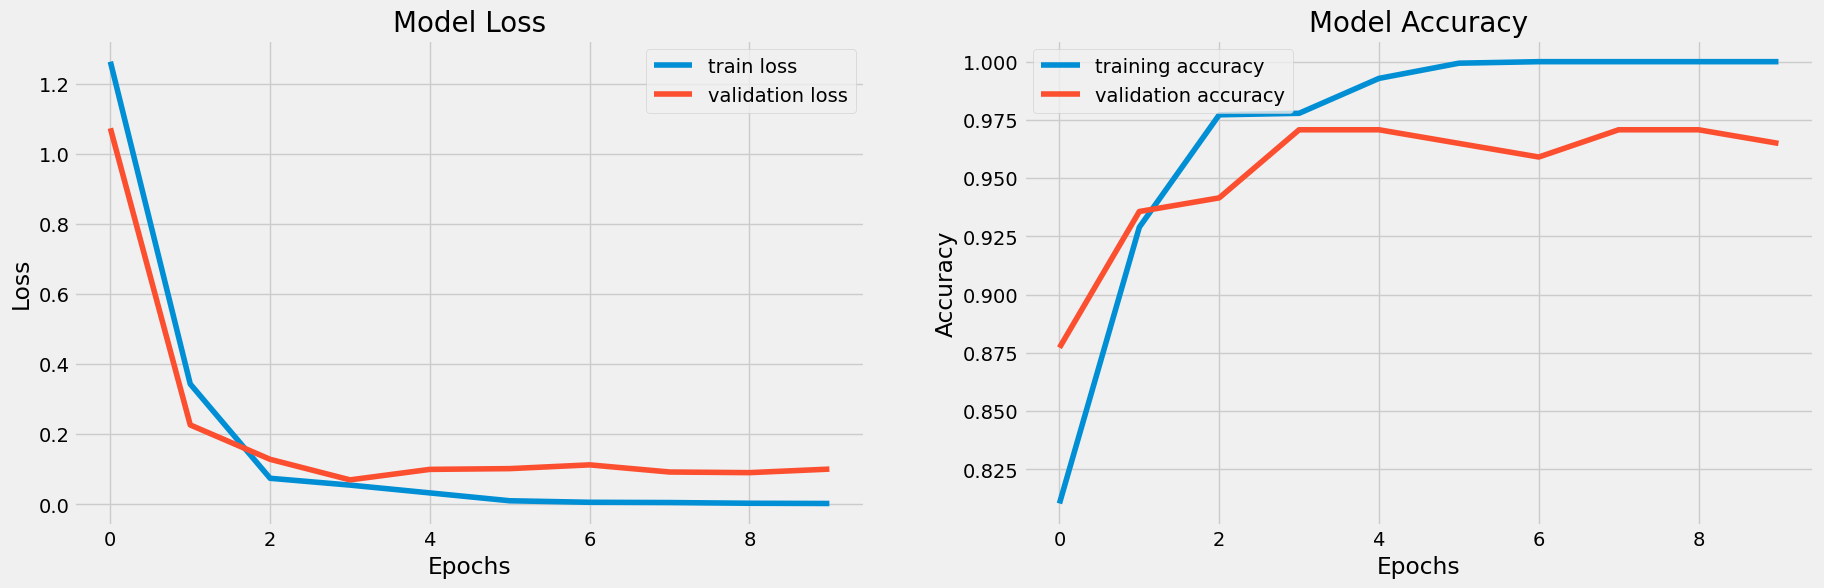

In [12]:
# Plotting the training and validation loss and accuracy for CNN
plt.style.use("fivethirtyeight")
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title("Model Loss", fontsize=20)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title("Model Accuracy", fontsize=20)
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc='best')
plt.show()